#Exploratory Data Analysis

###Import necessary libraries and load the data

In [83]:
#Import necessary libraries and load the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(style="whitegrid")

df = pd.read_csv("/content/drive/MyDrive/DSA210 Project/data/merged_data.csv", sep=";")

###Check The Dataset

In [84]:
print("Figure 1:")
display(df.head())
print("...")
display(df.tail())
print("\nFigure 2:")

#Check for missing data
display(df.isna().sum())
print("\n")

Figure 1:


,province,coast_stat,happiness_score_percent,employment_rate_percent,average_years_in_school,satisfied_with_education_percent,hospital_beds_per_100k,satisfied_with_healthcare_percent
0,adana,1,53.00,46.6,9.3,63.85,312,72.47
1,adiyaman,0,65.01,43.8,8.7,69.01,189,74.62
2,afyonkarahisar,0,76.43,51.9,8.6,88.89,317,87.33
3,agri,0,60.09,43.5,7.5,65.27,182,63.31
4,amasya,0,66.02,50.1,9.0,87.53,258,86.51


...


,province,coast_stat,happiness_score_percent,employment_rate_percent,average_years_in_school,satisfied_with_education_percent,hospital_beds_per_100k,satisfied_with_healthcare_percent
76,yalova,1,63.73,46.4,9.9,70.82,260,78.85
77,karabuk,0,56.38,44.2,9.2,75.72,294,76.95
78,kilis,0,60.85,46.3,9.4,82.02,277,78.99
79,osmaniye,0,45.77,43.6,9.2,73.40,314,78.39
80,duzce,1,72.77,55.3,9.1,52.77,223,73.95



Figure 2:


,0
province,0
coast_stat,0
happiness_score_percent,0
employment_rate_percent,0
average_years_in_school,0
satisfied_with_education_percent,0
hospital_beds_per_100k,0
satisfied_with_healthcare_percent,0


In figure 1, it is observed that the dataset does not present anything unexpected looking at the first and last 5 rows. The coastal status is on point for the provinces, the "percent" values are in [0,100], years in school and hospital beds per 100k also seem reasonable.

Figure 2 confirms that there are no missing values, so the dataset is ready for analysis.

###Univariate Analysis
Analysis of every variable individually in terms of their distribution, mean, median, standard deviation, min and max value, and quartiles. This step aims to get a better understanding of each variable in the dataset.

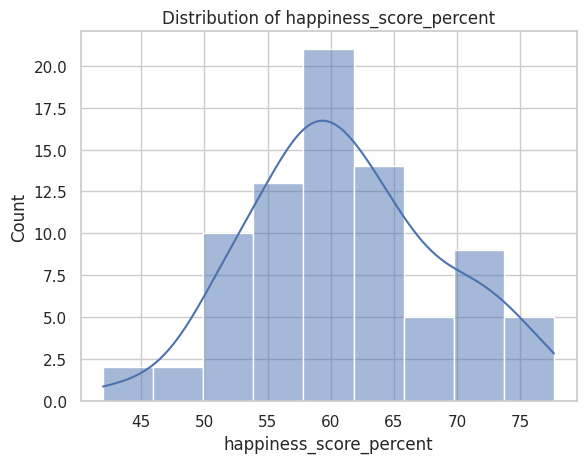

Statistics for:  happiness_score_percent


count    81.00000
mean     61.15284
std       7.53306
min      41.98000
25%      56.54000
50%      60.39000
75%      65.57000
max      77.66000
Name: happiness_score_percent, dtype: float64




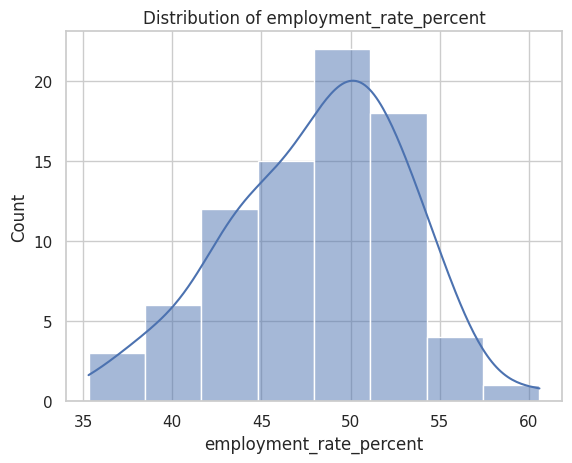

Statistics for:  employment_rate_percent


count    81.000000
mean     48.180247
std       4.936862
min      35.300000
25%      44.400000
50%      48.900000
75%      51.500000
max      60.600000
Name: employment_rate_percent, dtype: float64




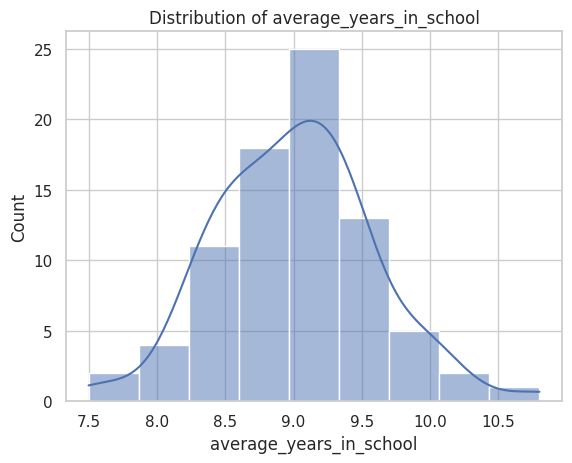

Statistics for:  average_years_in_school


count    81.000000
mean      9.007407
std       0.572228
min       7.500000
25%       8.600000
50%       9.000000
75%       9.400000
max      10.800000
Name: average_years_in_school, dtype: float64




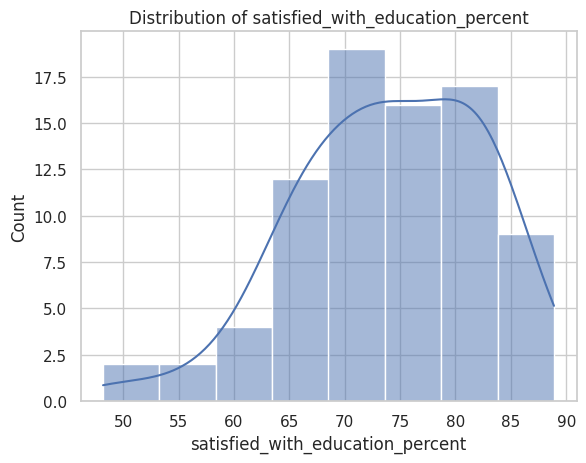

Statistics for:  satisfied_with_education_percent


count    81.000000
mean     74.088642
std       8.459955
min      48.180000
25%      68.780000
50%      74.630000
75%      81.470000
max      88.890000
Name: satisfied_with_education_percent, dtype: float64




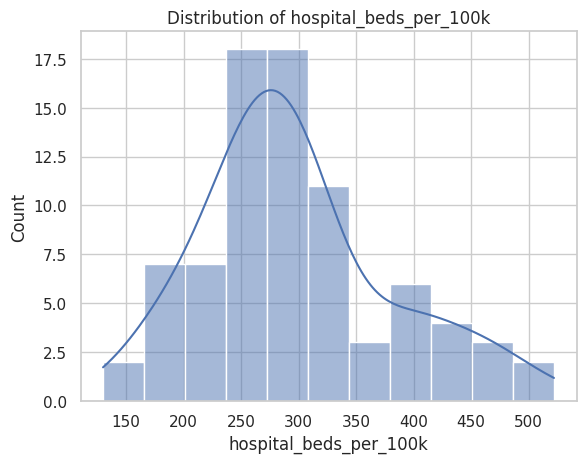

Statistics for:  hospital_beds_per_100k


count     81.000000
mean     297.074074
std       82.805612
min      130.000000
25%      244.000000
50%      280.000000
75%      325.000000
max      522.000000
Name: hospital_beds_per_100k, dtype: float64




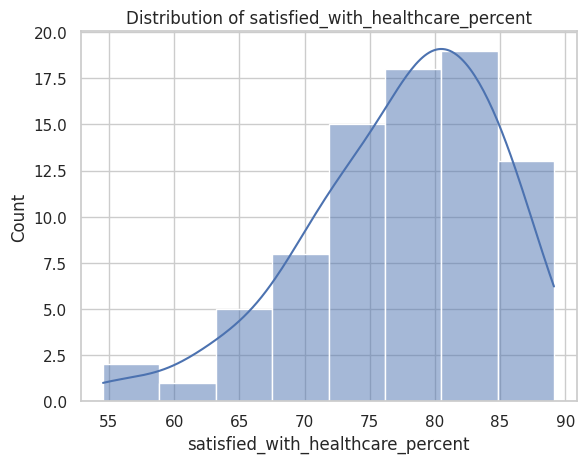

Statistics for:  satisfied_with_healthcare_percent


count    81.000000
mean     77.467654
std       7.305076
min      54.550000
25%      72.600000
50%      78.850000
75%      82.590000
max      89.130000
Name: satisfied_with_healthcare_percent, dtype: float64




In [85]:
cols = [
    'happiness_score_percent',
    'employment_rate_percent',
    'average_years_in_school',
    'satisfied_with_education_percent',
    'hospital_beds_per_100k',
    'satisfied_with_healthcare_percent'
]

for col in cols:
    sns.histplot(df[col], kde=True) #distribution and density
    plt.title(f"Distribution of {col}")
    plt.show()

    print("Statistics for: ", col)
    print("\n")
    print(df[col].describe())
    print("\n")

###Comparison of Coastal and Inland Provinces

Mean values of coastal(1) and inland(0) provinces:




,happiness_score_percent,employment_rate_percent,average_years_in_school,satisfied_with_education_percent,hospital_beds_per_100k,satisfied_with_healthcare_percent
coast_stat,,,,,,
0,62.013585,46.632075,8.890566,74.211509,295.471698,77.379434
1,59.523571,51.110714,9.228571,73.856071,300.107143,77.634643


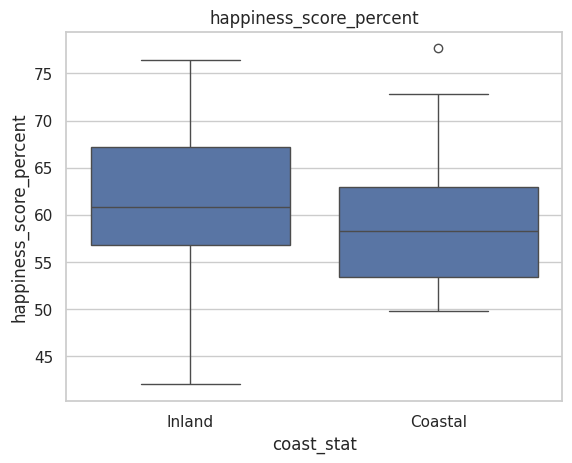

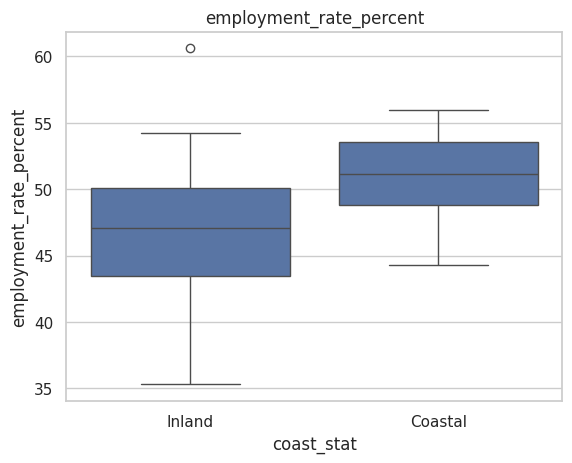

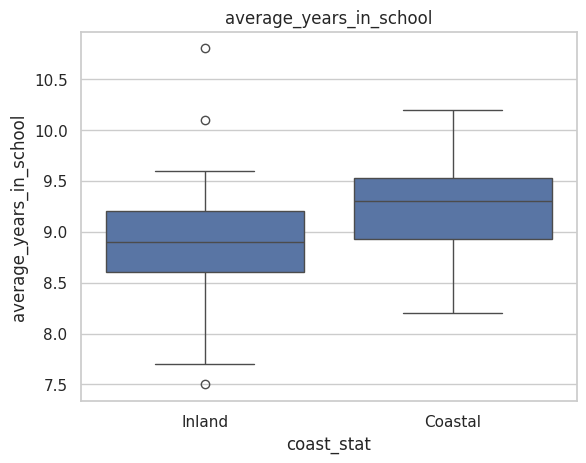

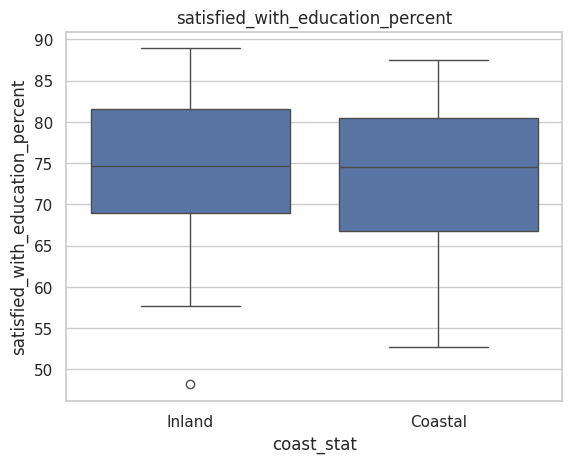

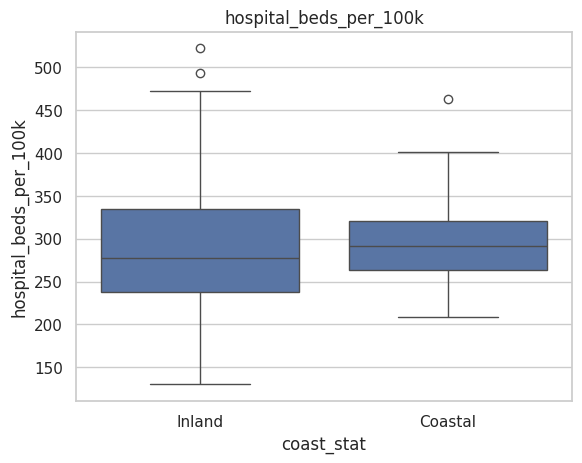

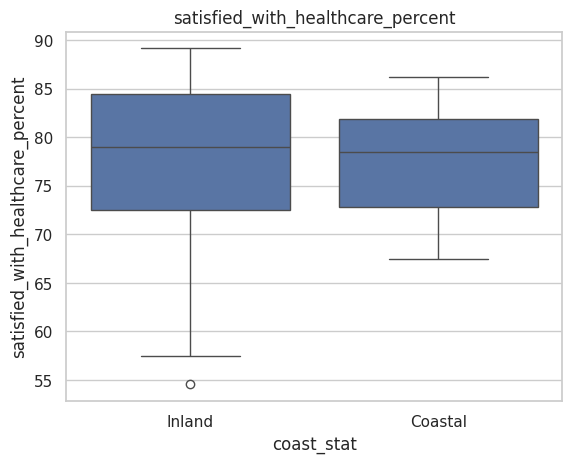

In [86]:
print("Mean values of coastal(1) and inland(0) provinces:")
print("\n")
display(df.groupby("coast_stat")[cols].mean())
print("\n")

for col in cols:
    sns.boxplot(data=df, x="coast_stat", y=col)
    plt.xticks([0,1], ['Inland','Coastal'])
    plt.title(col)
    plt.show()


###Correlation Between Variables

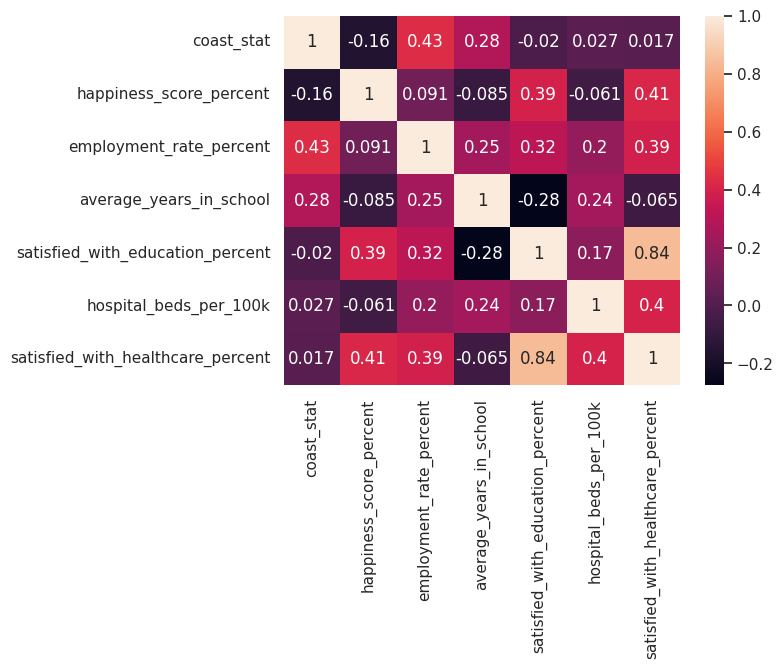

In [87]:
df_corr = df[['coast_stat',
             'happiness_score_percent',
             'employment_rate_percent',
             'average_years_in_school',
             'satisfied_with_education_percent',
             'hospital_beds_per_100k',
             'satisfied_with_healthcare_percent']].corr()

sns.heatmap(df_corr, annot=True)
plt.show()

#Hypothesis Tests

In [88]:
coastal = df[df['coast_stat'] == 1]
inland  = df[df['coast_stat'] == 0]

variables = [
    'happiness_score_percent',
    'employment_rate_percent',
    'average_years_in_school',
    'satisfied_with_education_percent',
    'hospital_beds_per_100k',
    'satisfied_with_healthcare_percent'
]

coastal.shape, inland.shape


##A reusable function for running 2-sample t-tests with different variance.

def ttest_func(var):
    t, p = stats.ttest_ind(coastal[var], inland[var], equal_var=False)

    print(f"\nT-Test for {var}:")
    print(f"Mean (Coastal): {coastal[var].mean():.3f}")
    print(f"Mean (Inland):  {inland[var].mean():.3f}")
    print(f"T-statistic: {t:.3f}")
    print(f"P-value:     {p:.3f}")
    print("\n")

    if p < 0.05:
        print("Reject H0: Coastal status may have a significant effect on", var + ".\n")
    else:
        print("Do not reject H0: Difference is not significant enough.\n")


##Tests on means of objective variables (i.e. the data is not given by the population)

###Test 1:

####This test aims to see if the employment rate differs meaningfully across coastal and inland provinces.

**H0: Coastal and inland provinces have equal mean employment rates.**

**H1: Coastal provinces have higher mean employment rate.**

Two Sample T-test on means of employment rates of coastal and inland groups with significance level of 0.05:

In [89]:
ttest_func('employment_rate_percent')


T-Test for employment_rate_percent:
Mean (Coastal): 51.111
Mean (Inland):  46.632
T-statistic: 4.902
P-value:     0.000


Reject H0: Coastal status may have a significant effect on employment_rate_percent.



###Test 2:

####This test aims to see if the average years in school differ meaningfully across coastal and inland provinces.

**H0: Coastal and inland population have equal mean years in education.**

**H1: Coastal population have higher mean years in education.**

Two Sample T-test on means of average years in school of coastal and inland groups with significance level of 0.05:

In [90]:
ttest_func('employment_rate_percent')


T-Test for employment_rate_percent:
Mean (Coastal): 51.111
Mean (Inland):  46.632
T-statistic: 4.902
P-value:     0.000


Reject H0: Coastal status may have a significant effect on employment_rate_percent.



###Test 3:

####This test aims to see if the healthcare service capabilities differ meaningfully across coastal and inland provinces.

**H0: Coastal and inland provinces have equal mean hospital beds per 100k people.**

**H1: Coastal provinces have higher mean hospital beds per 100k people.**

Two Sample T-test on means of hospital beds per 100k people of coastal and inland groups with significance level of 0.05:

In [91]:
ttest_func('hospital_beds_per_100k')


T-Test for hospital_beds_per_100k:
Mean (Coastal): 300.107
Mean (Inland):  295.472
T-statistic: 0.271
P-value:     0.787


Do not reject H0: Difference is not significant enough.



These tests on objective variables offer valuable insight on the research questions. We observe that for 2 out of 3 variables which are years in education and employment rates, coastal provinces tend to have higher means. Which translates to, coastal provinces having better well-being indicators on these two fields, education and employment objectively.

##Tests on subjective variables (i.e. life, education and healthcare satisfaction which are survey results)

###Test 1:

####This test aims to see if the subjective life satisfaction differs meaningfully across coastal and inland provinces.

**H0: Coastal and inland provinces have equal mean happiness scores.**

**H1: Coastal provinces have higher mean happiness score.**

Two Sample T-test on means of happiness scores of coastal and inland groups with significance level of 0.05:

In [92]:
ttest_func('happiness_score_percent')


T-Test for happiness_score_percent:
Mean (Coastal): 59.524
Mean (Inland):  62.014
T-statistic: -1.464
P-value:     0.148


Do not reject H0: Difference is not significant enough.



###Test 2:

####This test aims to see if the subjective satisfaction with education differs meaningfully across coastal and inland provinces.

**H0: Coastal and inland provinces have equal mean education satisfaction.**

**H1: Coastal provinces have higher mean education satisfaction.**

Two Sample T-test on means of education satisfaction of coastal and inland groups with significance level of 0.05:

In [93]:
ttest_func('satisfied_with_education_percent')


T-Test for satisfied_with_education_percent:
Mean (Coastal): 73.856
Mean (Inland):  74.212
T-statistic: -0.178
P-value:     0.859


Do not reject H0: Difference is not significant enough.



###Test 3:

####This test aims to see if the subjective satisfaction with healthcare differs meaningfully across coastal and inland provinces.

**H0: Coastal and inland provinces have equal mean healthcare satisfaction.**

**H1: Coastal provinces have higher mean healthcare satisfaction.**

Two Sample T-test on means of healthcare satisfaction of coastal and inland groups with significance level of 0.05:

In [94]:
ttest_func('satisfied_with_healthcare_percent')


T-Test for satisfied_with_healthcare_percent:
Mean (Coastal): 77.635
Mean (Inland):  77.379
T-statistic: 0.168
P-value:     0.867


Do not reject H0: Difference is not significant enough.



These tests on subjective variables indicate that there is no significant correlation between coastal-living and well-being. But it is interesting that the objective variables on healthcare and education did indicate people experience better well-being in coastal provinces, and people may not be realizing the situation.